In [12]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [13]:
with open("/kaggle/input/wordss/1661-0.txt", "r", encoding="utf-8") as file:
    text = file.read()


In [14]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense



In [15]:
tokenizer= Tokenizer()
tokenizer.fit_on_texts([text])



In [16]:
total_words=len(tokenizer.word_index)+1

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_sequences = []

for line in text.split("\n"):
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_seq = tokens[:i+1]  # ✅ Corrected variable name (was n_gram_Seq)
        input_sequences.append(n_gram_seq)


In [18]:
print(input_sequences[5])

[145, 4790, 1, 1020, 4, 128, 34]


In [19]:
max_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')



In [20]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = to_categorical(y, num_classes=total_words)

In [21]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=10, input_length=max_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

Epoch 1/200
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.0549 - loss: 6.6772
Epoch 2/200
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.0743 - loss: 6.0039
Epoch 3/200
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.1115 - loss: 5.5697
Epoch 4/200
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.1304 - loss: 5.3048
Epoch 5/200
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.1448 - loss: 5.0515
Epoch 6/200
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.1518 - loss: 4.8714
Epoch 7/200
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.1609 - loss: 4.6903
Epoch 8/200
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.1714 - loss: 4.5141
Epoch 9/200
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.1836 - loss: 4.3489
Epoch 10/200
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.1904 - loss: 4.2340
Epoch 11/200
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.2024 - loss: 4.0880
Epoch 12

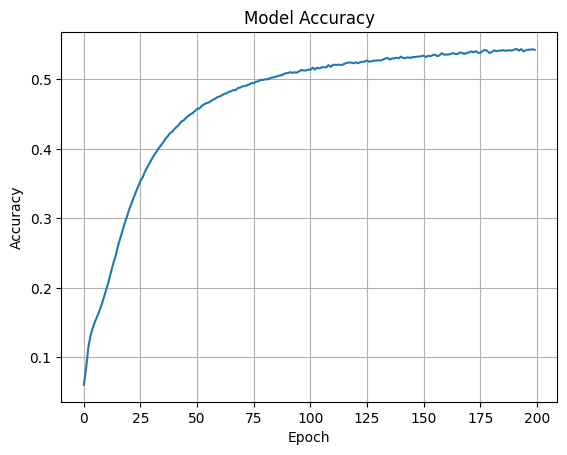

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
import matplotlib.pyplot as plt

# Train the model and store training history
history = model.fit(X, y, epochs=200, verbose=1)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()


In [23]:
def predict_next_word(seed_text, next_words=1):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted_probs)

        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += ' ' + word
                break
    return seed_text

In [24]:
print(predict_next_word("I love", 1))
print(predict_next_word("machine learning", 1))

I love you
machine learning and


In [27]:
# Assuming `model` is your trained Keras LSTM model
model.save("next_word_model.h5")


In [28]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
